# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso das letras
(b) e (c), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

a) a função lógica XOR

b) f(x) = log10(x), onde 1 ≤ x ≤ 10

c) f(x) = $10x^5+ 5x^4+ 2x^3– 0.5x^2+ 3x + 2$, onde 0 ≤ x ≤ 20

Dica: Selecione um conjunto de amostras para cada função (onde x é a entrada e f(x) é a saída
desejada - rótulo). Essas amostras devem ser divididas em, pelo menos, dois conjuntos:
treinamento e validação. Treine um perceptron de múltiplas camadas para que ele aprenda a
aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de
validação.

# a) Função lógica XOR
 **Importação das bibliotecas**

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, r2_score

from data_generator import generate_data_a, generate_data_b, generate_data_c

#### Declaração dos Arrays de entrada e saída

In [6]:
df = generate_data_a()

In [7]:
df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [11]:
X_train = df[['x1', 'x2']][:2].values
X_test = df[['x1', 'x2']][2:].values

In [12]:
y_train = df['y'][:2].values
y_test = df['y'][2:].values

### Construindo a rede neural

#### Inicializando a ann

In [13]:
ann = tf.keras.models.Sequential()

#### Criação das camadas do Perceptron

In [14]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim=2))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Treinamento

#### Compilando

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Treinando

In [19]:
history = ann.fit(X_train, y_train, batch_size = 64, epochs = 10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5000


#### Previsão

In [20]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 19ms/step


#### Matriz de confusão e acurácia

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [0 1]]


1.0

# b) f(x) = log10(x), onde 1 ≤ x ≤ 10

In [ ]:
df = generate_data_b(2000)
df.shape

(2000, 2)

In [ ]:
df.head()

,x,y
0,7.965604,0.901219
1,4.949906,0.694597
2,8.727381,0.940884
3,7.276312,0.861911
4,1.847596,0.266607


In [ ]:
X = df['x']
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Inicializando a Rede Neural
ann = Sequential()
#Adicionando as Camadas
ann.add(Dense(15, input_shape=(1,), activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(5, activation='relu'))
ann.add(Dense(1))

In [ ]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/100
20/20 - 0s - loss: 0.3362 - mean_squared_error: 0.1313 - val_loss: 0.2062 - val_mean_squared_error: 0.0460
Epoch 2/100
20/20 - 0s - loss: 0.1069 - mean_squared_error: 0.0159 - val_loss: 0.0752 - val_mean_squared_error: 0.0098
Epoch 3/100
20/20 - 0s - loss: 0.0730 - mean_squared_error: 0.0091 - val_loss: 0.0628 - val_mean_squared_error: 0.0054
Epoch 4/100
20/20 - 0s - loss: 0.0650 - mean_squared_error: 0.0054 - val_loss: 0.0603 - val_mean_squared_error: 0.0049
Epoch 5/100
20/20 - 0s - loss: 0.0620 - mean_squared_error: 0.0052 - val_loss: 0.0583 - val_mean_squared_error: 0.0048
Epoch 6/100
20/20 - 0s - loss: 0.0598 - mean_squared_error: 0.0050 - val_loss: 0.0555 - val_mean_squared_error: 0.0043
Epoch 7/100
20/20 - 0s - loss: 0.0583 - mean_squared_error: 0.0048 - val_loss: 0.0536 - val_mean_squared_error: 0.0042
Epoch 8/100
20/20 - 0s - loss: 0.0568 - mean_squared_error: 0.0048 - val_loss: 0.0518 - val_mean_squared_error: 0.0040
Epoch 9/100
20/20 - 0s - loss: 0.0555 - mean_squ

Epoch 68/100
20/20 - 0s - loss: 0.0147 - mean_squared_error: 5.1168e-04 - val_loss: 0.0130 - val_mean_squared_error: 3.7378e-04
Epoch 69/100
20/20 - 0s - loss: 0.0152 - mean_squared_error: 5.2502e-04 - val_loss: 0.0131 - val_mean_squared_error: 3.7657e-04
Epoch 70/100
20/20 - 0s - loss: 0.0150 - mean_squared_error: 5.1475e-04 - val_loss: 0.0133 - val_mean_squared_error: 3.6800e-04
Epoch 71/100
20/20 - 0s - loss: 0.0149 - mean_squared_error: 4.9480e-04 - val_loss: 0.0132 - val_mean_squared_error: 3.6297e-04
Epoch 72/100
20/20 - 0s - loss: 0.0153 - mean_squared_error: 5.0755e-04 - val_loss: 0.0131 - val_mean_squared_error: 3.6441e-04
Epoch 73/100
20/20 - 0s - loss: 0.0147 - mean_squared_error: 4.9377e-04 - val_loss: 0.0134 - val_mean_squared_error: 3.6507e-04
Epoch 74/100
20/20 - 0s - loss: 0.0148 - mean_squared_error: 4.7878e-04 - val_loss: 0.0136 - val_mean_squared_error: 3.6055e-04
Epoch 75/100
20/20 - 0s - loss: 0.0149 - mean_squared_error: 4.9452e-04 - val_loss: 0.0134 - val_mean_sq

### Plotando o Gráfico da função de Custo(Loss)


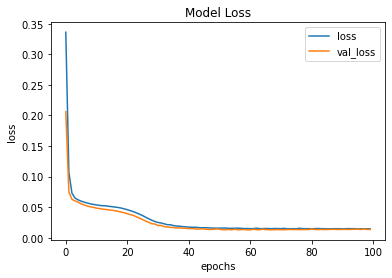

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

### Plotando o Gráfico do Erro Médio


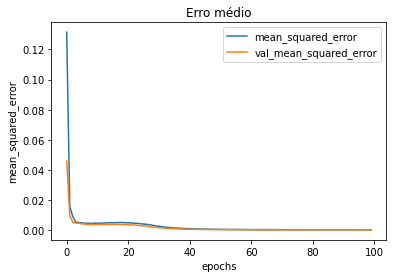

In [ ]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

### Predicao e Score

In [ ]:
y_pred = ann.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 99.28%


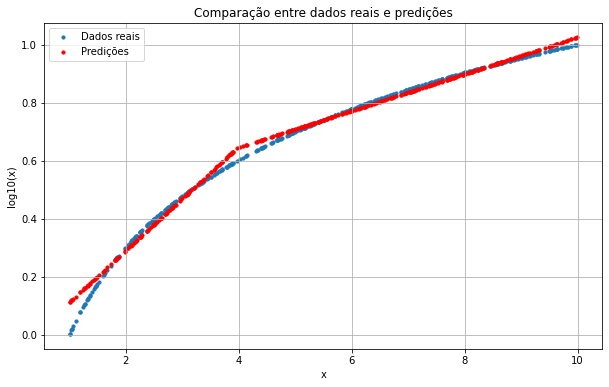

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Dados reais', s=10)
plt.scatter(X_test, y_pred, color='red', label='Predições', s=10)
plt.xlabel('x')
plt.ylabel('log10(x)')
plt.legend()
plt.title('Comparação entre dados reais e predições')
plt.grid(True)


# c) f(x) = $10x^5+ 5x^4+ 2x^3– 0.5x^2+ 3x + 2$, onde 0 ≤ x ≤ 20

In [ ]:
df = generate_data_c(4000)
df.shape

(4000, 2)

In [ ]:
df

,x,y
0,15.479121,9.180910e+06
1,8.777569,5.520627e+05
2,17.171958,1.537615e+07
3,13.947361,5.472468e+06
4,1.883547,3.192472e+02
...,...,...
3995,0.282531,2.902650e+00
3996,1.904672,3.361927e+02
3997,9.063839,6.469546e+05
3998,6.793249,1.559477e+05


In [ ]:
df.head()
X = df['x']
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
ann = Sequential()
ann.add(Dense(64, input_shape=(1,), activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(12, activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1))

In [ ]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/100
40/40 - 1s - loss: 5466021.5000 - mean_squared_error: 99539910393856.0000 - val_loss: 5884024.0000 - val_mean_squared_error: 109074821677056.0000
Epoch 2/100
40/40 - 0s - loss: 5465990.0000 - mean_squared_error: 99539289636864.0000 - val_loss: 5883930.0000 - val_mean_squared_error: 109072976183296.0000
Epoch 3/100
40/40 - 0s - loss: 5465630.0000 - mean_squared_error: 99532427755520.0000 - val_loss: 5882981.5000 - val_mean_squared_error: 109054294753280.0000
Epoch 4/100
40/40 - 0s - loss: 5462815.5000 - mean_squared_error: 99479000711168.0000 - val_loss: 5876473.0000 - val_mean_squared_error: 108922811711488.0000
Epoch 5/100
40/40 - 0s - loss: 5447659.0000 - mean_squared_error: 99177455419392.0000 - val_loss: 5845395.5000 - val_mean_squared_error: 108266856120320.0000
Epoch 6/100
40/40 - 0s - loss: 5390319.5000 - mean_squared_error: 97943457628160.0000 - val_loss: 5739909.0000 - val_mean_squared_error: 105851817820160.0000
Epoch 7/100
40/40 - 0s - loss: 5228633.0000 - mean_s

Epoch 53/100
40/40 - 0s - loss: 3258202.2500 - mean_squared_error: 30206465146880.0000 - val_loss: 3398524.7500 - val_mean_squared_error: 33827430858752.0000
Epoch 54/100
40/40 - 0s - loss: 3150926.5000 - mean_squared_error: 29997163085824.0000 - val_loss: 3281873.7500 - val_mean_squared_error: 32108324061184.0000
Epoch 55/100
40/40 - 0s - loss: 3014349.2500 - mean_squared_error: 28209680744448.0000 - val_loss: 3133511.2500 - val_mean_squared_error: 30632851800064.0000
Epoch 56/100
40/40 - 0s - loss: 2850339.5000 - mean_squared_error: 26859223908352.0000 - val_loss: 2958681.0000 - val_mean_squared_error: 28685516144640.0000
Epoch 57/100
40/40 - 0s - loss: 2649885.0000 - mean_squared_error: 23997108453376.0000 - val_loss: 2736008.0000 - val_mean_squared_error: 26249973989376.0000
Epoch 58/100
40/40 - 0s - loss: 2412787.0000 - mean_squared_error: 22434377891840.0000 - val_loss: 2483784.0000 - val_mean_squared_error: 22380151832576.0000
Epoch 59/100
40/40 - 0s - loss: 2149689.2500 - mean_

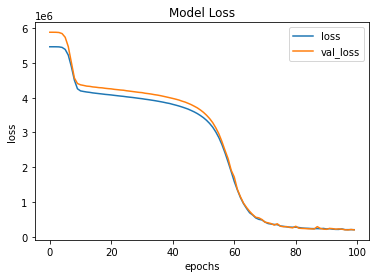

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

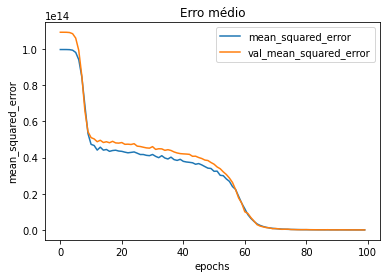

In [ ]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

In [ ]:
y_pred = ann.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 99.84%


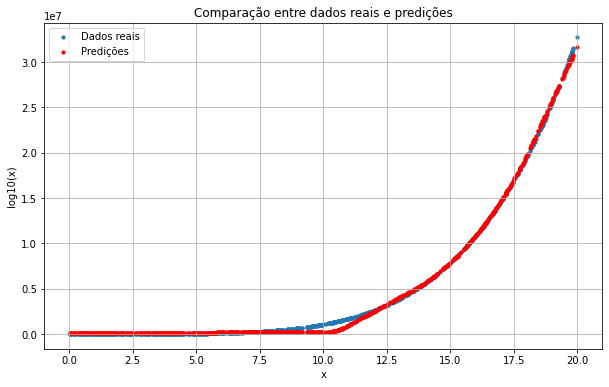

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Dados reais', s=10)
plt.scatter(X_test, y_pred, color='red', label='Predições',s=10)
plt.xlabel('x')
plt.ylabel('log10(x)')
plt.legend()
plt.title('Comparação entre dados reais e predições')
plt.grid(True)
